## Color Detection
<p> The color detection task has been completed using the following tools:
    <ul>
        <li>Open CV</li>
        <li>Numpy & Pandas</li>
        <li>K-Means Clustering</li>
        <li>Jupyter Notebook</li>
        </ul>

  <p>I find the color of the region where mouse is hover by calculating the closest color that matches the actual color and display the color name and also display the top 10 colors contained in that image.

### Step 1:
<p> Importing all the required libraries.

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import webcolors
import math

### Step 2:
<p>Reading the input image using Opencv and displaying it.</p>



**Note:** I have test the code on the 4 images i.e. colorpic11,colorpic2,colorpic3,colorpic4.<br>
Un-comment the particular image to use it.


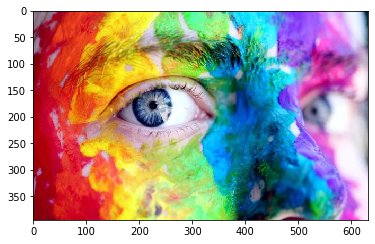

In [2]:
img=cv2.imread('colorpic11.jpg')
#img=cv2.imread('colorpic2.jpg')
#img=cv2.imread('colorpic3.jpg')
#img=cv2.imread('colorpic4.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Step 3:
<p>Reading the dataset that contains all the colors name details using pandas. 

In [3]:
columns_names=["color","color_name","hex","R","G","B"]
df_color = pd.read_csv('colors.csv', names=columns_names, header=None)
df_color.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


### Step 4:
<p> Create a function that will calculate the closest color and return it's name.

In [4]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(df_color)):
        d = abs(R- int(df_color.loc[i,"R"])) + abs(G- int(df_color.loc[i,"G"]))+ abs(B- int(df_color.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = df_color.loc[i,"color_name"]
    #print(cname)
    return cname

### Step 5:
<p> Create a function that will get X,Y coordinates when you will hover over the image.

In [5]:
hover= False
r = g = b = xpos = ypos = 0
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        global b,g,r,xpos,ypos, hover
        hover = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
       


### Step 6:
<p> Run the following cell and hover the mouse to the region whose color you want to know.<p>
    
**Note:** Press **ESC** to close the picture. 

In [6]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

while(1):

    cv2.imshow("image",img)

    if (hover):
   
        # Setting the rectangle bar on the image
        cv2.rectangle(img,(20,20), (600,60), (b,g,r),-1)

        #getting the color name of the image hover
        color_Name = getColorName(r,g,b) 
        
        #Displaying the color name
        cv2.putText(img, color_Name,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, color_Name,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        hover=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()

## The following lines of codes will show the top 10 colors in the images.


<p> This function gets the R,G,B value of each color.

In [7]:
def RGB(color):
    A=int(color[0])
    B=int(color[1])
    C=int(color[2])
    requested_colour = (A,B,C)
    closest_name = get_colour_name(requested_colour)
    return closest_name

<p>This function returns the name of color on the basis of R,G,B value using the webcolor library.If the acutal name is not present, it calculates the most nearest one and returns it.

In [8]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - int(requested_colour[0])) ** 2
        gd = (g_c - int(requested_colour[1])) ** 2
        bd = (b_c - int(requested_colour[2])) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return  closest_name

<p>This function gets top 10 names in a list and plots it in a pie chart.

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3) # Reshape using numpy
    
    clf = KMeans(n_clusters = number_of_colors) # using K-means to get top 10 colors,here number of color is 10.
    labels = clf.fit_predict(modified_image) #Fit and predict the image
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    for i in range(len(ordered_colors)):
        for j in range(len(ordered_colors[i])):
            ordered_colors[i][j]=(math.floor(ordered_colors[i][j]))
            
        
    name_colors = [RGB(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    #Display the picture using matplotlib
    if (show_chart):
        plt.figure(figsize = (40,10))
        plt.pie(counts.values(), labels = name_colors, colors=name_colors,autopct='%1.1f%%')
    
    return rgb_colors

### Run the following function to display the graph.

[array([172., 100., 230.]),
 array([157., 124., 145.]),
 array([ 12., 112., 150.]),
 array([189.,  22.,  32.]),
 array([ 27., 185., 229.]),
 array([225., 212., 230.]),
 array([21., 61., 66.]),
 array([149., 225., 125.]),
 array([235., 209.,  62.]),
 array([216., 113.,  38.])]

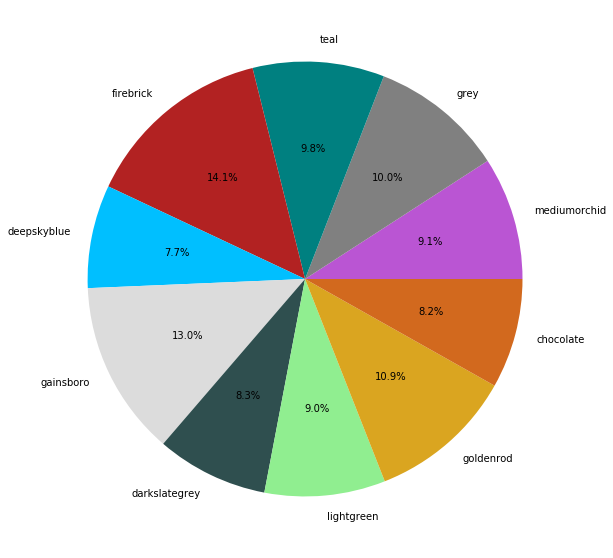

In [10]:
get_colors(image, 10, True)